# Classification

- It's a type of supervised learning where the goal is to predict categorized data
    - prediction of hot vs cold (for regression it'll be the prediction of temperature)
    - Sentiment analysis: happy, sad, neutral
    - Facial recognition: human, animal, plant, object
- Types:
    - Binary Classification: 2 classes/categories (0 or 1) Spam vs Ham emails
    - Multi-class Classification: car brand: Ford, GMC, BMW, Honda
    - Ordinal Classification: school grades A, B, C, D, F or movie rating 1 to 5
    - Imbalanced Classification: when the frequency or distribution of one class is higher than the other. e.g. Fraud Detection 
    - Hierarchical Classification: involves working with hierarchy in the class (tree-like structure) Animal -> Genus -> Species
- Common Algorithms:
    - Logistic Regression (binary classification)
    - Decision Trees Classifier
    - Random Forest Classifier
    - Support Vector Machines (Support Vector Classifier)
    - k-Nearest Neighbor (kNN)
    - Naive Bayes

# Classification Evaluation

### Exercise: Build a model to predict AHD (Acquired Heart Disease)

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#machine learning
from sklearn import svm #support vector machines
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
#for evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay 

Data Dictionary:
- Age
- Sex (1 M and 0 F)
- ChestPain type (4 values)
- RestBP: resting blood pressure
- Chol: serum cholestoral in mg/dl
- Fbs: fasting blood sugar > 120 mg/dl
- RestECG: resting electrocardiographic results (values 0,1,2)
- MaxHR: maximum heart rate achieved
- ExAng: exercise induced angina
- Oldpeak: ST depression induced by exercise relative to rest
- Slope: the slope of the peak exercise ST segment
- Ca: number of major vessels (0-3) colored by fluoroscopy
- Thal: thalassemia normal; fixed defect; reversible defect
- AHD: (Target) Acquired Heart Disease

In [106]:
path = '/Users/bassel_instructor/Documents/Datasets/'

df = pd.read_csv(path+'heart.txt')
df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0,normal,No


### EDA

In [107]:
df.isna().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           0
Thal         0
AHD          0
dtype: int64

Checking for the target imbalance

In [108]:
df['AHD'].value_counts(normalize=True)

AHD
No     0.541254
Yes    0.458746
Name: proportion, dtype: float64

In [109]:
df['ChestPain'].value_counts()

ChestPain
asymptomatic    144
nonanginal       86
nontypical       50
typical          23
Name: count, dtype: int64

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        303 non-null    int64  
 1   Sex        303 non-null    int64  
 2   ChestPain  303 non-null    object 
 3   RestBP     303 non-null    int64  
 4   Chol       303 non-null    int64  
 5   Fbs        303 non-null    int64  
 6   RestECG    303 non-null    int64  
 7   MaxHR      303 non-null    int64  
 8   ExAng      303 non-null    int64  
 9   Oldpeak    303 non-null    float64
 10  Slope      303 non-null    int64  
 11  Ca         303 non-null    int64  
 12  Thal       303 non-null    object 
 13  AHD        303 non-null    object 
dtypes: float64(1), int64(10), object(3)
memory usage: 33.3+ KB


<Axes: xlabel='Age'>

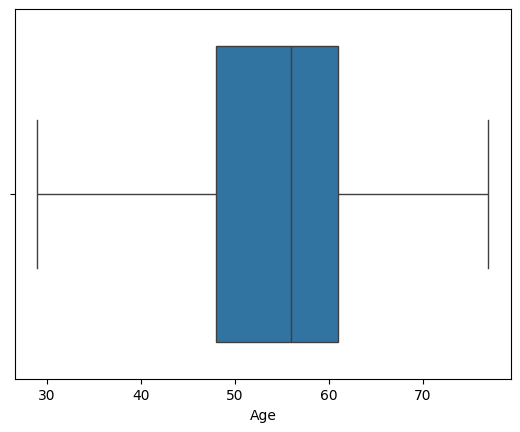

In [111]:
sns.boxplot(data=df, x='Age')

Check for the average age of AHD yes vs no

In [112]:
df.groupby('AHD')[['Age']].agg(['mean', 'median'])

Age       
          mean median
AHD                  
No   52.585366   52.0
Yes  56.625899   58.0

In [113]:
df['Sex'].value_counts()

Sex
1    206
0     97
Name: count, dtype: int64

<Axes: xlabel='RestECG', ylabel='count'>

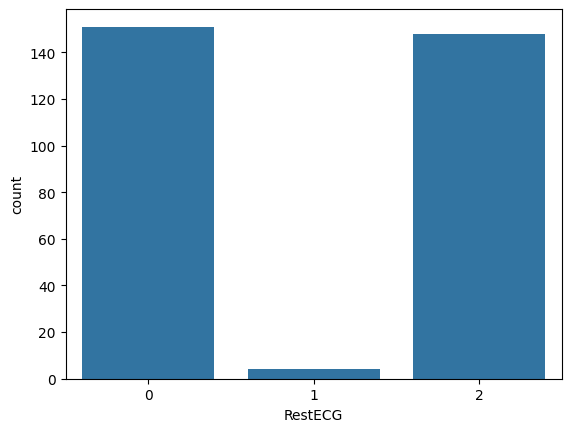

In [114]:
sns.countplot(data=df, x='RestECG')

Inspect Age, AHD, and Sex in one view

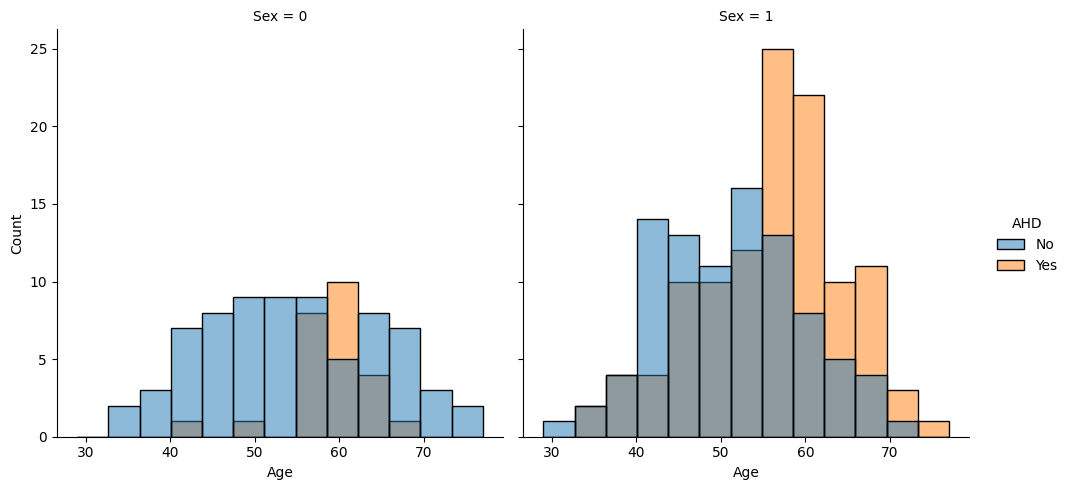

In [115]:
sns.displot(data=df, x='Age', hue='AHD', col='Sex')

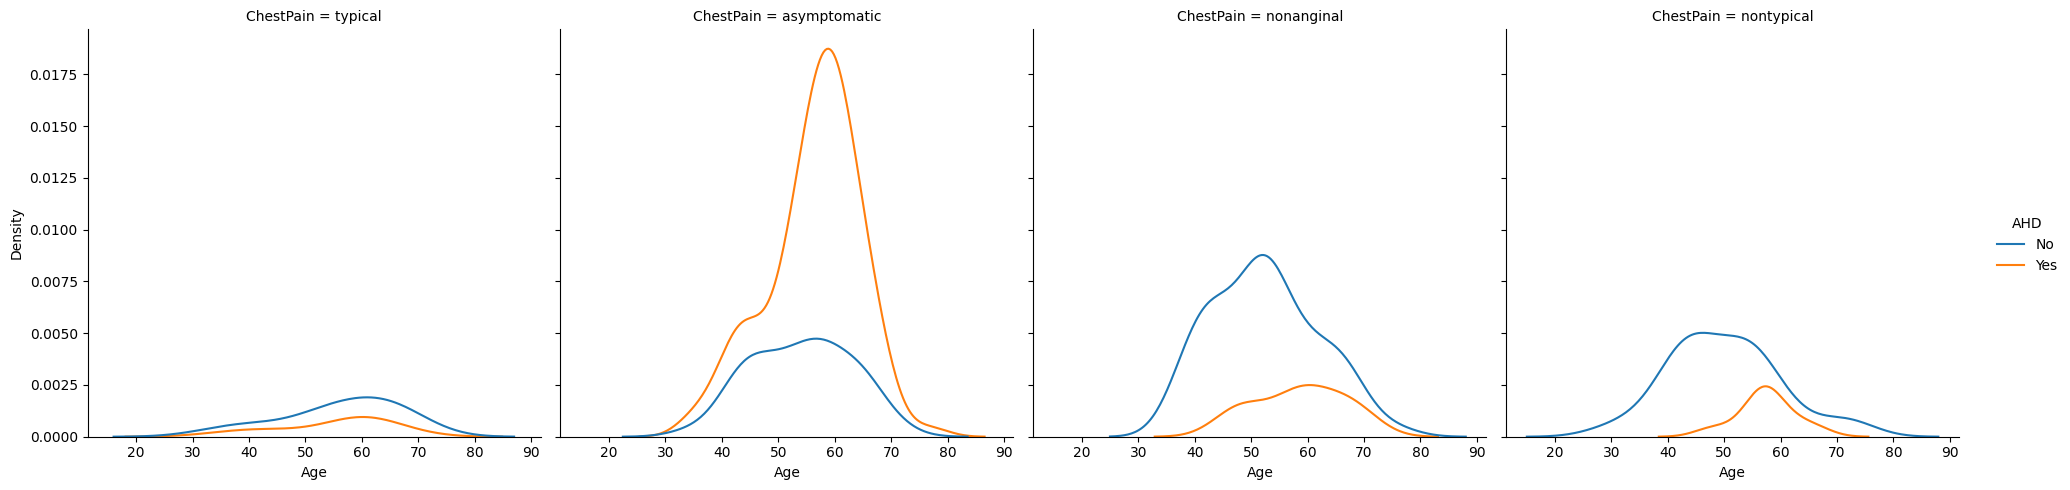

In [116]:
sns.displot(data=df, x='Age', hue='AHD', col='ChestPain', kind='kde')

<Axes: xlabel='ChestPain', ylabel='Age'>

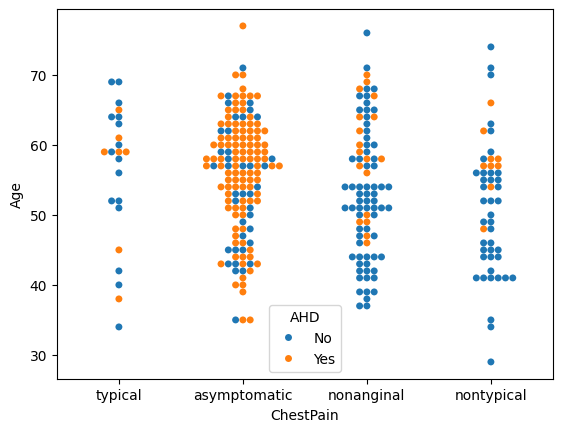

In [117]:
sns.swarmplot(data=df, y='Age', x='ChestPain', hue='AHD')

is high chol linked to having AHD?

In [118]:
df.groupby('AHD')[['Chol']].agg(['median', 'mean'])

Chol            
    median        mean
AHD                   
No   234.5  242.640244
Yes  249.0  251.474820

As a healthcare provider/payer we need to make sure our population's median is below 249 to increase the number of patients with no AHD

### Data Preprocessing

- Encoding
- Scaling

In [119]:
df_org = df.copy()

In [120]:
df = pd.get_dummies(df, columns=['ChestPain', 'Thal'], dtype=int)
df.head()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,AHD,ChestPain_asymptomatic,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_fixed,Thal_normal,Thal_reversable
0,63,1,145,233,1,2,150,0,2.3,3,0,No,0,0,0,1,1,0,0
1,67,1,160,286,0,2,108,1,1.5,2,3,Yes,1,0,0,0,0,1,0
2,67,1,120,229,0,2,129,1,2.6,2,2,Yes,1,0,0,0,0,0,1
3,37,1,130,250,0,0,187,0,3.5,3,0,No,0,1,0,0,0,1,0
4,41,0,130,204,0,2,172,0,1.4,1,0,No,0,0,1,0,0,1,0


In [121]:
df['AHD'] = df['AHD'].map({'Yes':1, 'No':0})
df.head()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,AHD,ChestPain_asymptomatic,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_fixed,Thal_normal,Thal_reversable
0,63,1,145,233,1,2,150,0,2.3,3,0,0,0,0,0,1,1,0,0
1,67,1,160,286,0,2,108,1,1.5,2,3,1,1,0,0,0,0,1,0
2,67,1,120,229,0,2,129,1,2.6,2,2,1,1,0,0,0,0,0,1
3,37,1,130,250,0,0,187,0,3.5,3,0,0,0,1,0,0,0,1,0
4,41,0,130,204,0,2,172,0,1.4,1,0,0,0,0,1,0,0,1,0


In [122]:
X = df.drop(columns='AHD', axis=1)
y = df['AHD']

In [123]:
#scaling
MMS = MinMaxScaler()

X_scaled = MMS.fit_transform(X)

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=.2, random_state=4)

![SVM](https://datatron.com/wp-content/uploads/2021/05/Support-Vector-Machine.png)

### Training SVM
- Support Vector Machines - powerful and popular machine learning algorithm
- It can be used for both regression and classification
    - Regression: `SupportVectorRegressor`
    - Classification: `SupportVectorClassifier`
- SVM searches for a hyperplane that best separates the classes in the feature space. It's also called decision boundary.
- Components:
    - Support Vector: data points that are the closest to the hyperplane
    - Margins: the distance between the hyperplane and support vectors
    - Kernels: adjusts the ability to handle non-linear relationships in the data

Hyperparameters:
- `C` the regularization intensity
- `gamma` it controls smoothness of the decision boundary
- `kernel` adjusts the decision boundary algo to work with linear, polynomial, sigmoid, rbf (radial basis function)

![g](https://scikit-learn.org/stable/_images/sphx_glr_plot_rbf_parameters_001.png)

In [125]:
svc_model = svm.SVC()

In [126]:
param_grid = {
                'C':[0.1, 1, 5, 10, 50, 100],
                'gamma':[10, 1, 0.5, 0.1, 0.01, 0.001],
                'kernel':['linear', 'rbf', 'sigmoid']
            }

In [127]:
gs_svc_model = GridSearchCV(svc_model, param_grid, cv=6, verbose=3)

> verbose=3 will give you a detailed log of every try

In [128]:
gs_svc_model.fit(X_train, y_train)

Fitting 6 folds for each of 108 candidates, totalling 648 fits
[CV 1/6] END ....C=0.1, gamma=10, kernel=linear;, score=0.854 total time=   0.0s
[CV 2/6] END ....C=0.1, gamma=10, kernel=linear;, score=0.829 total time=   0.0s
[CV 3/6] END ....C=0.1, gamma=10, kernel=linear;, score=0.750 total time=   0.0s
[CV 4/6] END ....C=0.1, gamma=10, kernel=linear;, score=0.825 total time=   0.0s
[CV 5/6] END ....C=0.1, gamma=10, kernel=linear;, score=0.800 total time=   0.0s
[CV 6/6] END ....C=0.1, gamma=10, kernel=linear;, score=0.775 total time=   0.0s
[CV 1/6] END .......C=0.1, gamma=10, kernel=rbf;, score=0.537 total time=   0.0s
[CV 2/6] END .......C=0.1, gamma=10, kernel=rbf;, score=0.537 total time=   0.0s
[CV 3/6] END .......C=0.1, gamma=10, kernel=rbf;, score=0.550 total time=   0.0s
[CV 4/6] END .......C=0.1, gamma=10, kernel=rbf;, score=0.550 total time=   0.0s
[CV 5/6] END .......C=0.1, gamma=10, kernel=rbf;, score=0.550 total time=   0.0s
[CV 6/6] END .......C=0.1, gamma=10, kernel=rb

GridSearchCV(cv=6, estimator=SVC(),
             param_grid={'C': [0.1, 1, 5, 10, 50, 100],
                         'gamma': [10, 1, 0.5, 0.1, 0.01, 0.001],
                         'kernel': ['linear', 'rbf', 'sigmoid']},
             verbose=3)

In [129]:
print(gs_svc_model.best_params_)

{'C': 10, 'gamma': 10, 'kernel': 'linear'}


In [130]:
gs_accuracy = gs_svc_model.best_score_
gs_accuracy

0.8427845528455284

> Accuracy is not the only measure we can use for classification performance evaluation. Let's learn about additional metrics and evaluation techniques.

### Performance Measurement

#### Confusion Matrix

In [131]:
# get the predicted values
y_test_pred = gs_svc_model.best_estimator_.predict(X_test)
y_test_pred


array([1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0])

In [132]:
# build the confusion matrix
cm_svc = confusion_matrix(y_test, y_test_pred)
cm_svc

array([[28,  4],
       [ 7, 22]])

The best way to read the results is to visualize the CM

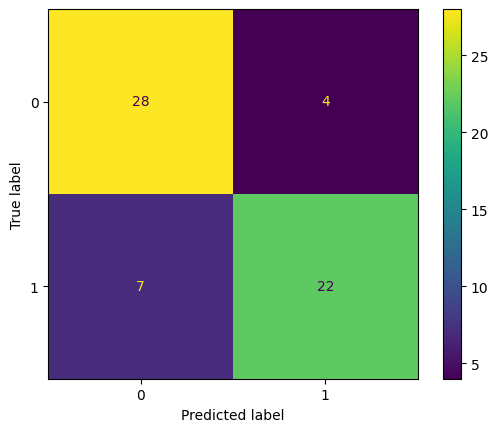

In [96]:
cm_svc_disp = ConfusionMatrixDisplay(confusion_matrix=cm_svc)
cm_svc_disp.plot()

- We have 11 (7 +4) instances where the model misclassified the prediction of AHD
    - 7 cases where we incorrectly predicted no AHD, but it's actually AHD
    - 4 cases where we incorrectly predicted AHD, but it's actually no AHD
- For each quad we have a name (considering 1 = positive and 0 = negative)
    - True Negative: 28 cases
    - True Positive: 22 cases
    - False Positive: 4 cases {Type I errors}
    - False Negative: 7 cases {Type II errors}
- The goal is to reduce both numbers (False Positive and Negative)
- In some scenarios, it's hard to reduce both. So, we have to prioritize one over the other. This is where where the **Business Scenario** becomes important. In our example:
    - If the goal is to find AHD patients as soon as possible and provide treatment, the goal is to focus on reducing FN.
    - However, in a rare scenario, giving AHD patients medication will help them, but giving to the ones that don't have will cause server health consequences. 

In [97]:
28 + 4 + 7 + 22

61

In [98]:
len(X_test)

61

##### Evaluation Metrics

From the confusion matrix, we can derive 4 evaluation metrics:
- **Accuracy**
    - Formula: $(TN+TP)/(TN+FP+FN+TP)$
    - The ratio of correctly predicted instances to the total instances 
    - Use case: simple, fast, and straightforward metric, but sensitive to imbalanced data. In any case, it's always recommended to use additional metrics.
- **Precision** or Positive Predictive Value
    - Formula: $TP/(TP+FP)$
    - The ratio of correctly predicted positives to the total of all predicted positives. 
    - Use Case: it's important when the impact of high FP is important
- **Sensitivity** or Recall or True Positive Rate
    - Formula: $TP/(TP + FN)$
    - The ratio of correctly predicted positives to all actual positives.
    - Use Case: it's important when the impact of high FN is important
- **Specificity** or True Negative Rate
    - Formula: $TN/(TN +FP)$
    - The ratio of correctly predicted negatives to all actual negatives.
    - Use Case: it's important when the impact of FP is costly
- **F1 Score**
    - Harmonic mean of precision and recall


![cm](https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEicyOwn09o1imx_g5itoPx9z7a18rffv9qeBoUyVhMqqEu7_o1Hw7lSeg1Th9GMHEZi1i-bZOOtO92t7S9G0daeKKngzbISY0KXEtBh9dbf-9fcGB9OzQb1Pg2WChV7ZXVHPkrjG9SpEg/s1600/ConfusionMatrix.png)

Measure Applications:
- Medical Diagnosis:
    - Use sensitivity to ensure that most actual positive cases are detected.
    - Use specificity to minimize false positives
- Spam Detection
    - Use precision to minimize false positives (reduce marking legitimate emails as spam)
    - Use sensitivity(recall) to ensure most actual/true spam is detected 
- Fraud Detection
    - Use sensitivity to detect most actual fraudulent transactions.
- Recommender System:
    - Use precision to ensure recommended items are relevant 
    - Use recall to ensure most relevant items are recommended 

> Note: you can use accuracy with all the recommended measures above.


- Image Classification:
    - Use accuracy first because your focus on teh correctly identified classes and you're dealing with multiple classes.

- Imbalanced Data:
    - Don't focus only on Accuracy, use precision and recall, or their harmonic mean (F1-score)



SVM Visualization

In [99]:
import pandas as pd
import numpy as np
import plotly.graph_objs as go
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


# Select features and the target label
features = ['Age', 'Chol', 'MaxHR']
X = df[features].values
y = df['AHD'].values

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM model with a linear kernel
clf = make_pipeline(StandardScaler(), svm.SVC(kernel='linear'))

# Fit the model
clf.fit(X_train, y_train)

# Create a grid to evaluate the model
xx, yy, zz = np.meshgrid(
    np.linspace(X[:, 0].min(), X[:, 0].max(), 30),
    np.linspace(X[:, 1].min(), X[:, 1].max(), 30),
    np.linspace(X[:, 2].min(), X[:, 2].max(), 30)
)

grid = np.c_[xx.ravel(), yy.ravel(), zz.ravel()]
decision_values = clf.decision_function(grid)
decision_values = decision_values.reshape(xx.shape)

# Plot the 3D scatter plot
fig = go.Figure()

# Add scatter plot for the two classes
fig.add_trace(go.Scatter3d(
    x=X[y == 0, 0], y=X[y == 0, 1], z=X[y == 0, 2],
    mode='markers',
    marker=dict(size=5, color='blue'),
    name='Class 0'
))

fig.add_trace(go.Scatter3d(
    x=X[y == 1, 0], y=X[y == 1, 1], z=X[y == 1, 2],
    mode='markers',
    marker=dict(size=5, color='red'),
    name='Class 1'
))

# Add decision boundary as a surface plot
fig.add_trace(go.Surface(
    x=xx[:, :, 0], y=yy[:, :, 0], z=-zz[:, :, 0],
    surfacecolor=(decision_values < 0).astype(int),
    colorscale='RdBu',
    opacity=0.3,
    showscale=False
))

# Update layout for better visualization
fig.update_layout(
    scene=dict(
        xaxis_title=features[0],
        yaxis_title=features[1],
        zaxis_title=features[2],
    ),
    title='3D Scatter Plot with Decision Boundary',
    showlegend=True
)

# Show the plot
fig.show()


> Let's compare our output to another classification model.

### Naive Bayes

- Naive Bayes classifiers are a family of algorithms based on the Bayes' theorem
- The "Naive" part comes from the simplified assumptions made by the Naive Theorem
- They are simple and efficient and widely utilized machine learning models

![NB](https://miro.medium.com/v2/resize:fit:600/1*aFhOj7TdBIZir4keHMgHOw.png)

In [133]:
from sklearn.naive_bayes import GaussianNB

In [134]:
# we're redefining the following because they were overwritten by the visualization data above
X = df.drop(columns='AHD')
y = df['AHD']

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=.2, random_state=4)


In [135]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [136]:
y_test_pred_nb = nb_model.predict(X_test)
cm_nb = confusion_matrix(y_test, y_test_pred_nb)

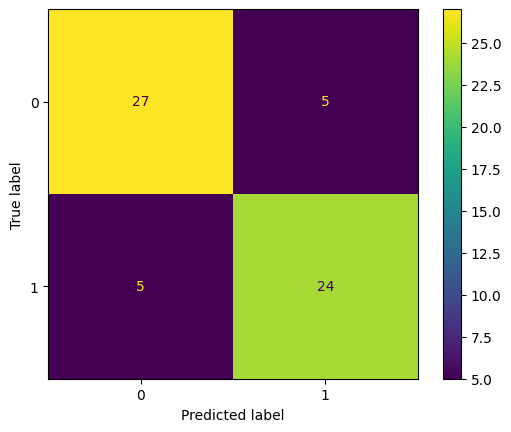

In [137]:
cm_nb_disp = ConfusionMatrixDisplay(confusion_matrix=cm_nb)
cm_nb_disp.plot()

Text(0.5, 1.0, 'NB Confusion Matrix')

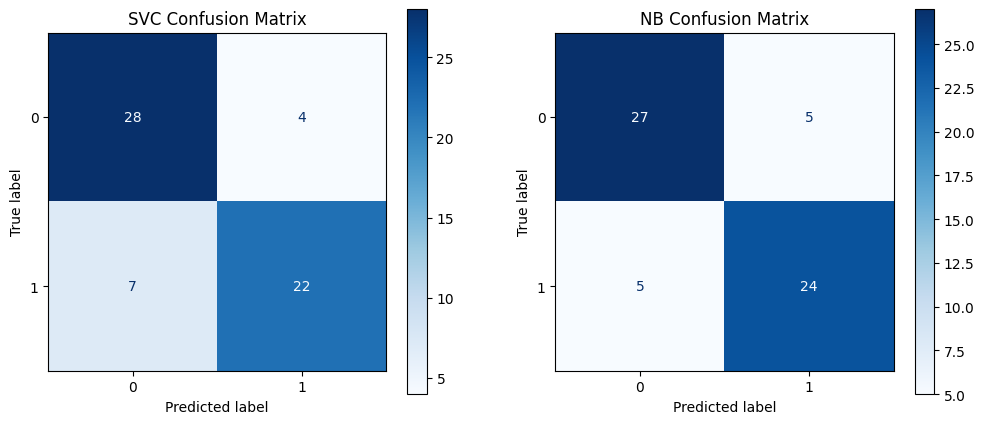

In [142]:
fig, ax = plt.subplots(1,2, figsize=(12,5))

cm_svc_disp.plot(ax=ax[0], cmap='Blues')
ax[0].set_title('SVC Confusion Matrix')

cm_nb_disp.plot(ax=ax[1], cmap='Blues')
ax[1].set_title('NB Confusion Matrix')


- For NB, it is balanced with level I and II errors. It's also more precise because TP are higher. Having low false negatives helps identify more patients with AHD even though that some may have wrong diagnosis.

In [148]:
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree

In [144]:
dt_model = DecisionTreeClassifier(max_depth=3)

In [146]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'Thal_normal <= 0.5\ngini = 0.496\nsamples = 242\nvalue = [132, 110]\nclass = No AHD'),
 Text(0.25, 0.625, 'ChestPain_asymptomatic <= 0.5\ngini = 0.377\nsamples = 111\nvalue = [28.0, 83.0]\nclass = AHD'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'Slope <= 0.25\ngini = 0.497\nsamples = 37\nvalue = [20, 17]\nclass = No AHD'),
 Text(0.0625, 0.125, 'gini = 0.278\nsamples = 12\nvalue = [10, 2]\nclass = No AHD'),
 Text(0.1875, 0.125, 'gini = 0.48\nsamples = 25\nvalue = [10, 15]\nclass = AHD'),
 Text(0.375, 0.375, 'Oldpeak <= 0.081\ngini = 0.193\nsamples = 74\nvalue = [8, 66]\nclass = AHD'),
 Text(0.3125, 0.125, 'gini = 0.469\nsamples = 16\nvalue = [6, 10]\nclass = AHD'),
 Text(0.4375, 0.125, 'gini = 0.067\nsamples = 58\nvalue = [2, 56]\nclass = AHD'),
 Text(0.75, 0.625, 'ChestPain_asymptomatic <= 0.5\ngini = 0.327\nsamples = 131\nvalue = [104, 27]\nclass = No AHD'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'Oldpeak <= 0.403\ngini = 0.213\nsamples = 91\nva

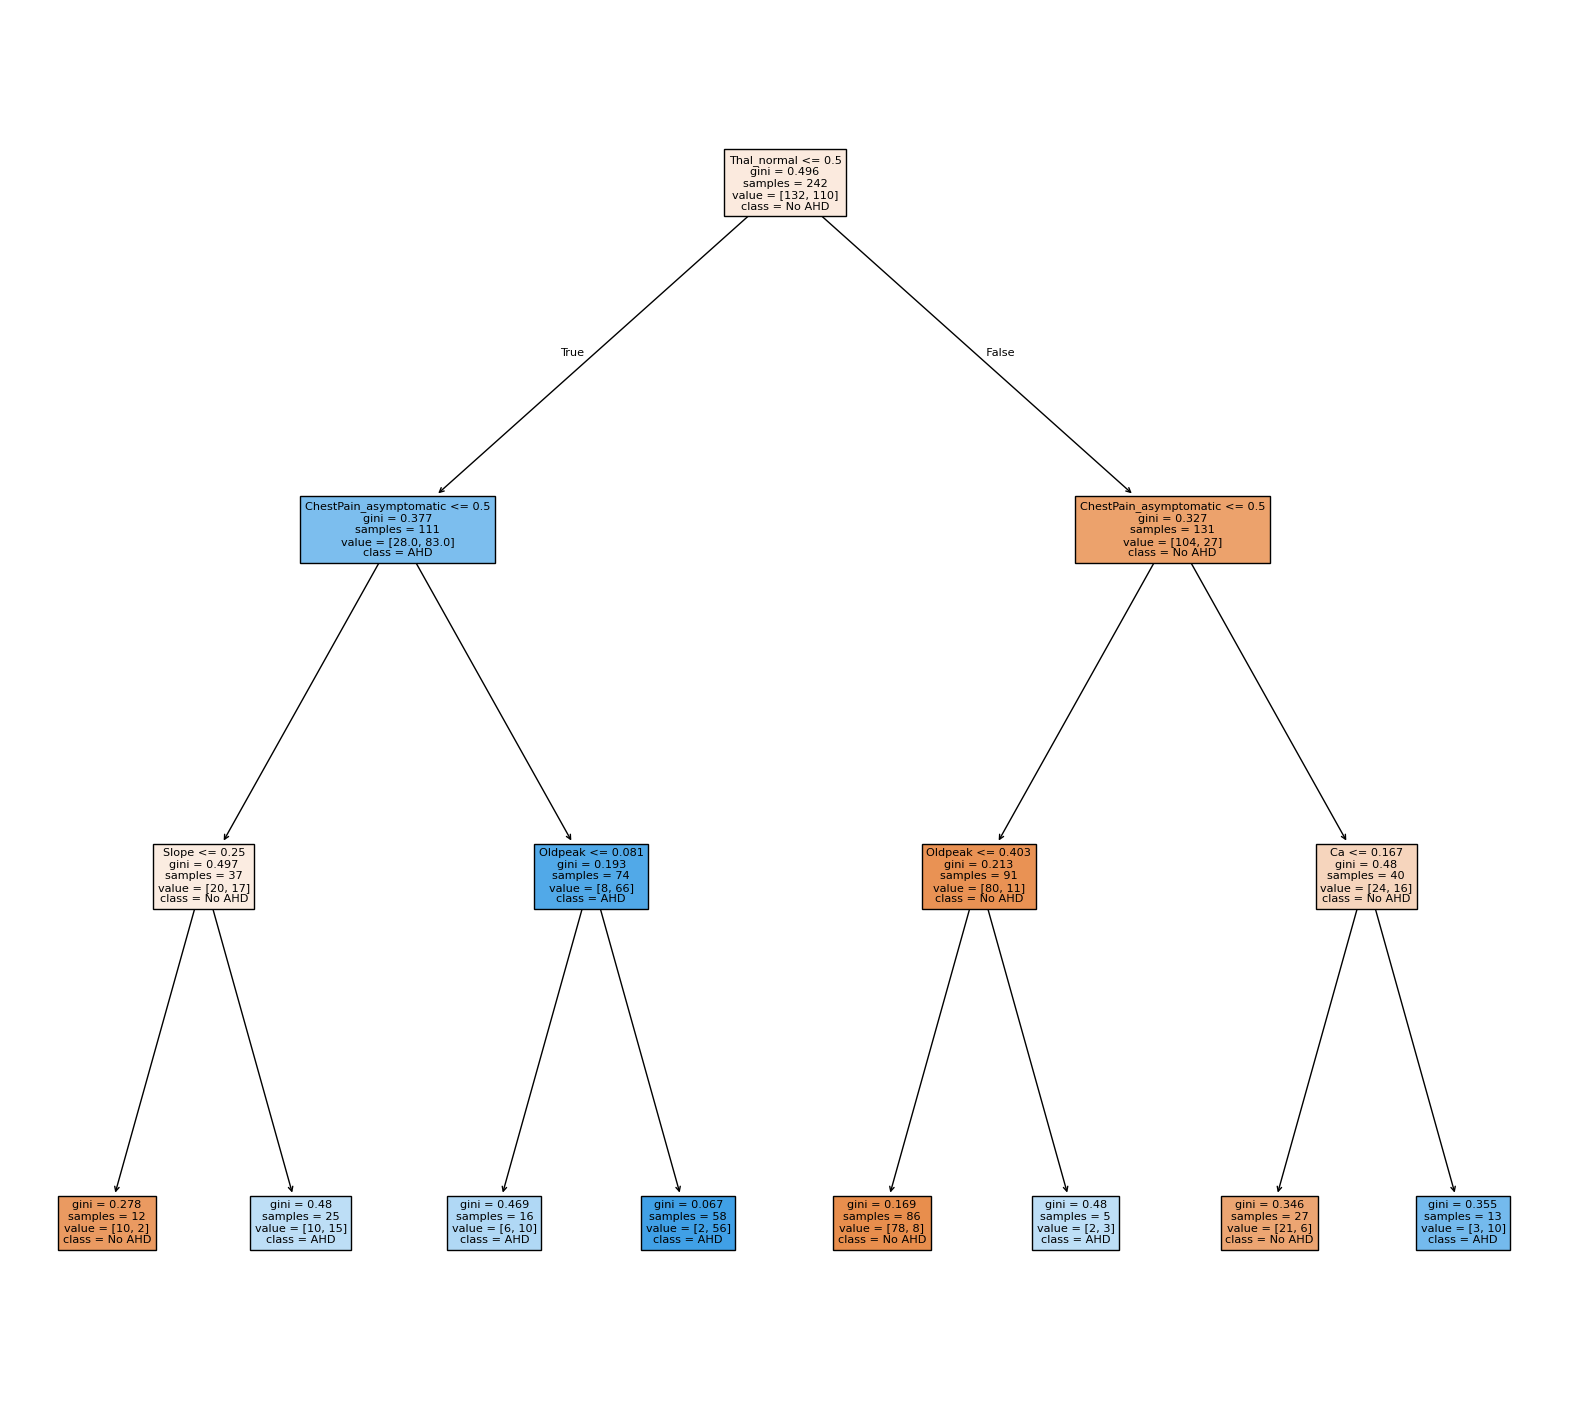

In [150]:
plt.figure(figsize=(20,18))
plot_tree(dt_model, feature_names=X.columns, class_names=['No AHD', 'AHD'], filled=True)